Some typical NumPy 'random' functions:

In [1]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

[[0.84438195 0.75356699]
 [0.17103223 0.61371743]
 [0.73155939 0.27506265]]
[-0.2832684   1.41409248 -0.8257922   1.84015613 -0.43644219]
[52 31 69 41 33 40  3 65 77 88]
[4 5 8]
[ 0.61621184 -1.13784809  1.06972356 -0.04370217 -0.36186952 -0.31174444
  0.68730715  0.0731818  -1.00595314  1.59131351]
None


AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [6]:
import pandas as pd
import numpy as np
import time


start_pandas = time.time()  
pandas_data = pd.Series(np.random.randint(1, 101, size=1000000))
end_pandas = time.time()  

start_numpy = time.time() 
numpy_data = np.random.randint(1, 101, size=1000000)
end_numpy = time.time()

pandas_time = end_pandas - start_pandas
numpy_time = end_numpy - start_numpy

print(f"Pandas Time: {pandas_time}")
print(f"NumPy Time: {numpy_time}")

if pandas_time > numpy_time:
    print("NumPy is faster.")
else:
    print("Pandas is faster.")



Pandas Time: 0.0073282718658447266
NumPy Time: 0.006978511810302734
NumPy is faster.


AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Using NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [1]:
import pandas as pd
import numpy as np
import time

start_pandas = time.time()
df = pd.read_csv('sleep_health.csv')
df.columns = df.columns.str.strip()

# Use pandas to calculate mean
mean_SD1 = df['Sleep Duration'].mean()
mean_SBP1 = df['Systolic blood pressure'].mean()  
mean_DBP1 = df['Diastolic blood pressure'].mean()
mean_HR1 = df['Heart Rate'].mean()
mean_DS1 = df['Daily Steps'].mean()
end_pandas = time.time()

start_numpy = time.time() 
data = np.genfromtxt('sleep_health.csv', delimiter=',', skip_header=0, dtype=None, encoding='utf-8', names=True)

sleep_duration = data['Sleep_Duration'].astype(float) 
age = data['Age'].astype(int)  
heart_rate = data['Heart_Rate'].astype(int)  
daily_steps = data['Daily_Steps'].astype(int) 

# Use numpy to calculate mean
mean_SD2 = np.mean(sleep_duration)
mean_SBP2 = np.mean(data['Systolic_blood_pressure'].astype(int))  
mean_DBP2 = np.mean(data['Diastolic_blood_pressure'].astype(int))  
mean_HR2 = np.mean(heart_rate)
mean_DS2 = np.mean(daily_steps)
end_numpy = time.time() 

# Use pandas to calculate correlation
corr_sleep_age = df['Sleep Duration'].corr(df['Age'])
corr_sleep_heart_rate = df['Sleep Duration'].corr(df['Heart Rate'])
corr_sleep_daily_steps = df['Sleep Duration'].corr(df['Daily Steps'])

# Use numpy to calculate correlation
corr_sleep_age_np = np.corrcoef(sleep_duration, age)[0, 1]
corr_sleep_heart_rate_np = np.corrcoef(sleep_duration, heart_rate)[0, 1]
corr_sleep_daily_steps_np = np.corrcoef(sleep_duration, daily_steps)[0, 1]

# Use pandas to calculate standard deviation
std_sleep_duration_pd = df['Sleep Duration'].std()
print(f"Standard Deviation of Sleep Duration(Pandas): {std_sleep_duration_pd}")

# Use numpy to calculate standard deviation
std_sleep_duration_np = np.std(sleep_duration, ddof=1) 
print(f"Standard Deviation of Sleep Duration(Numpy): {std_sleep_duration_np}")

if (end_numpy - start_numpy) < (end_pandas - start_pandas):
    print("NumPy is faster.")
else:
    print("Pandas is faster.")

Standard Deviation of Sleep Duration(Pandas): 0.7956567308898189
Standard Deviation of Sleep Duration(Numpy): 0.7956567308898189
NumPy is faster.


AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

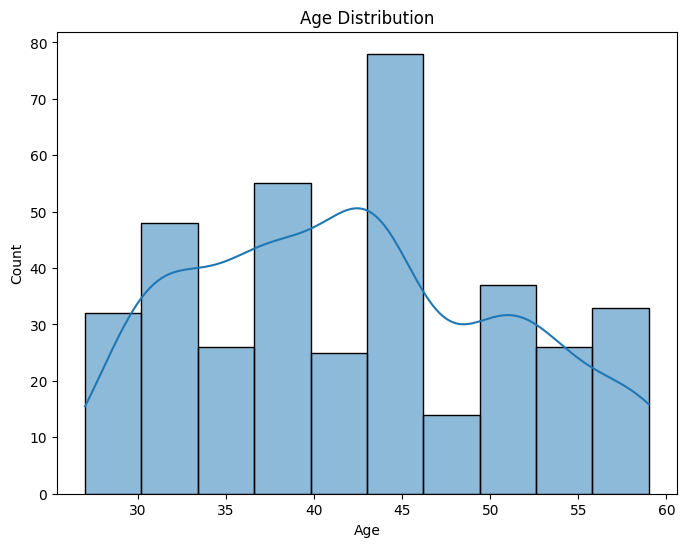

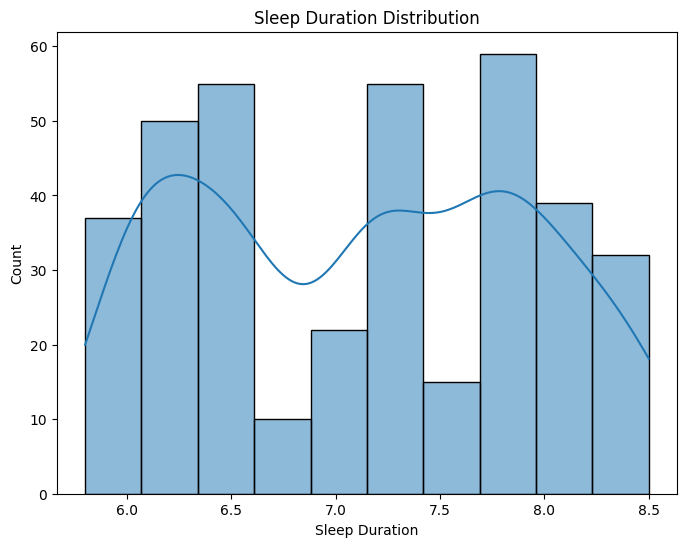

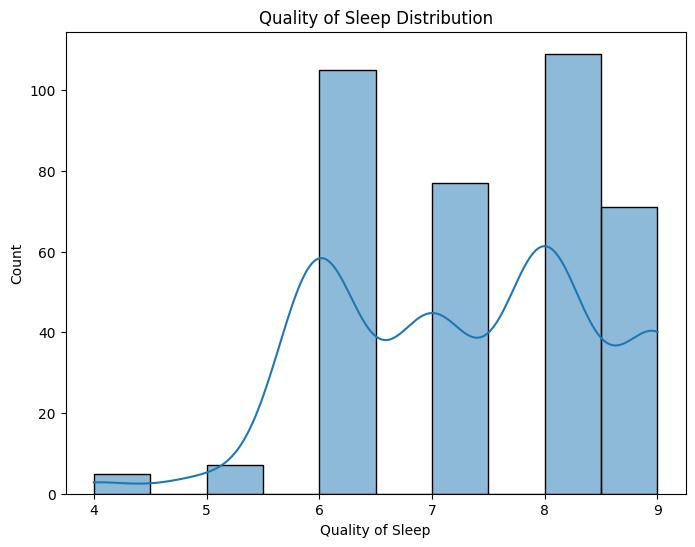

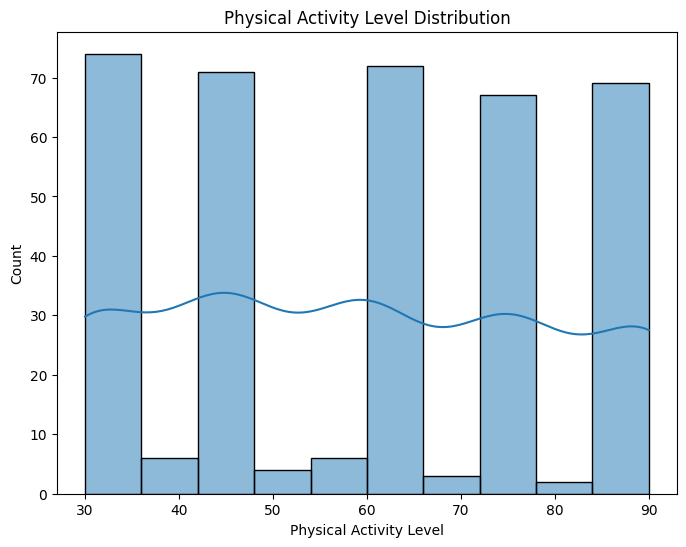

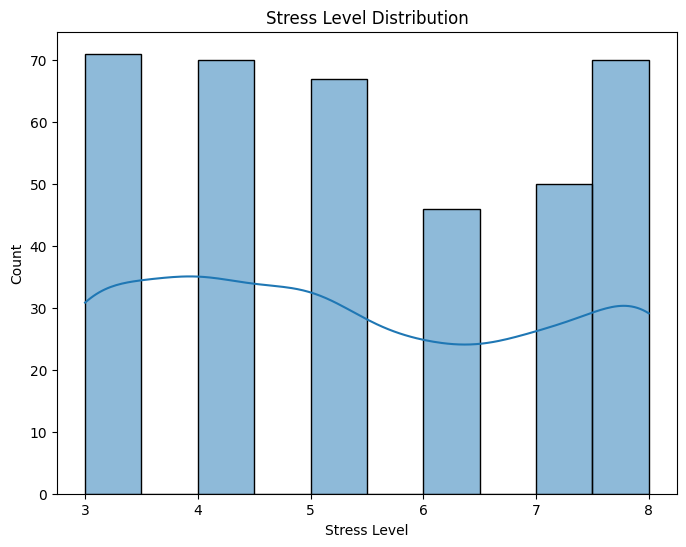

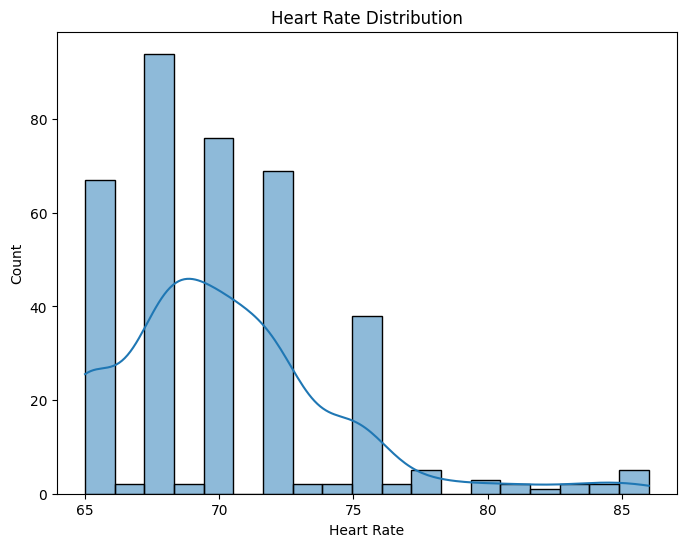

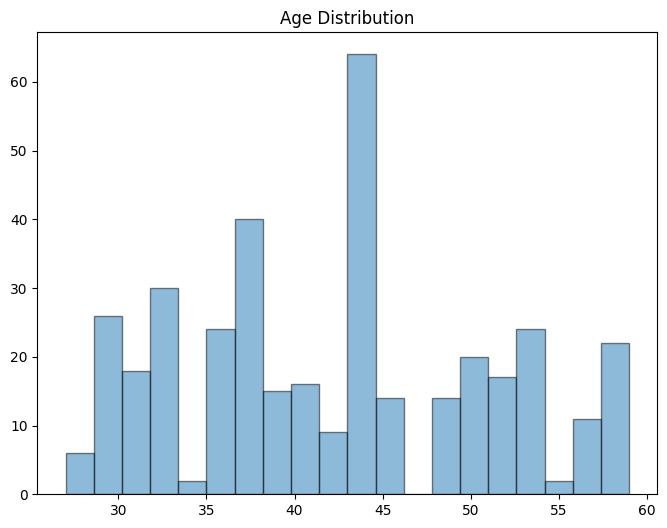

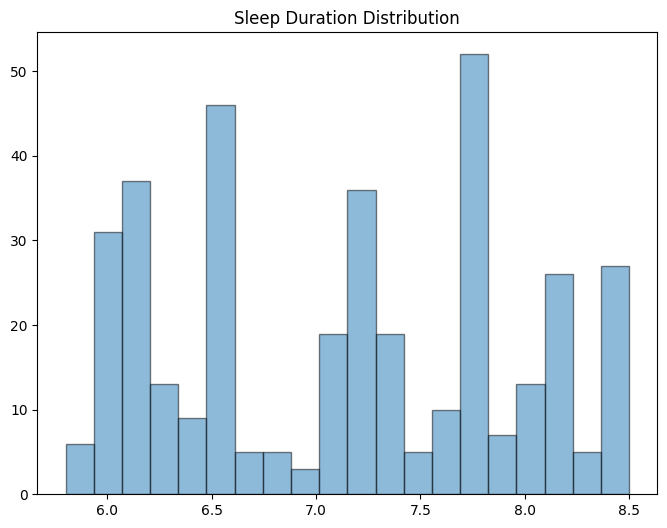

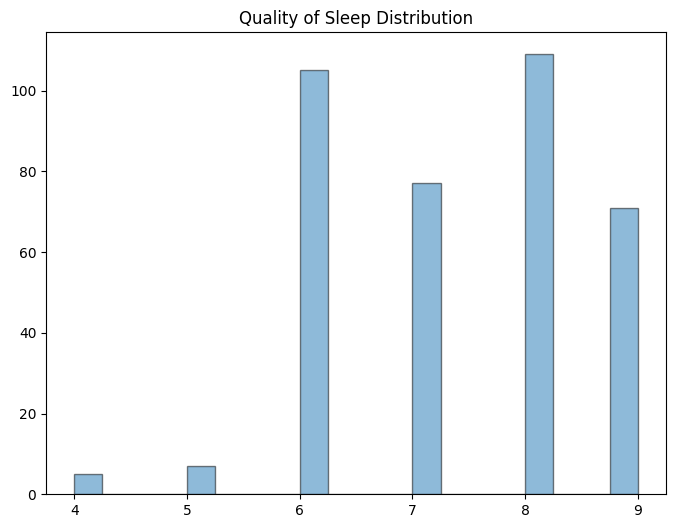

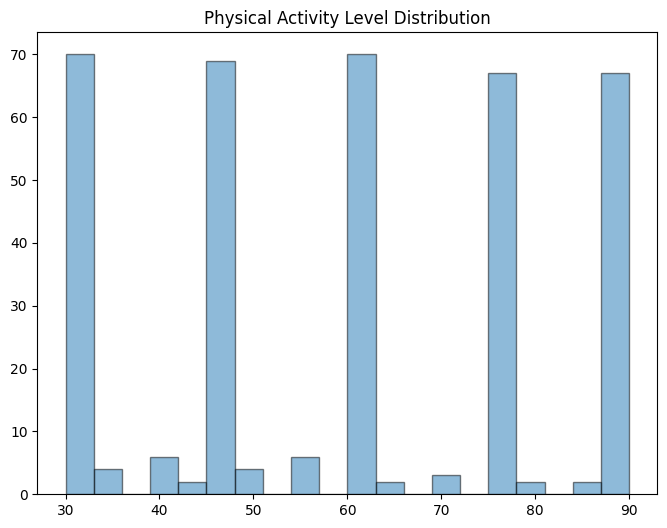

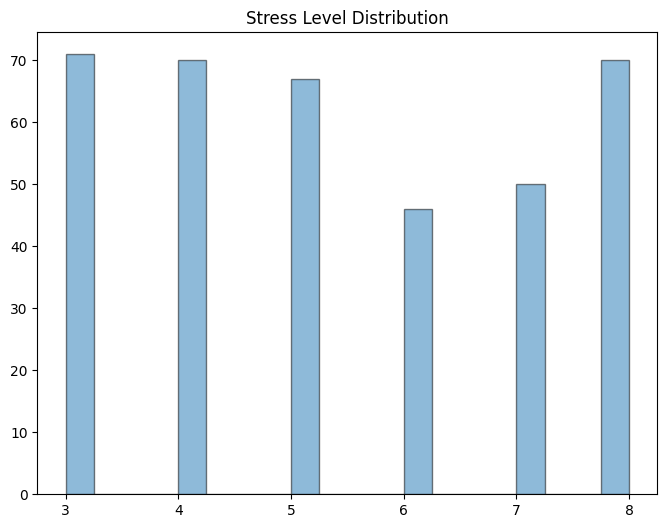

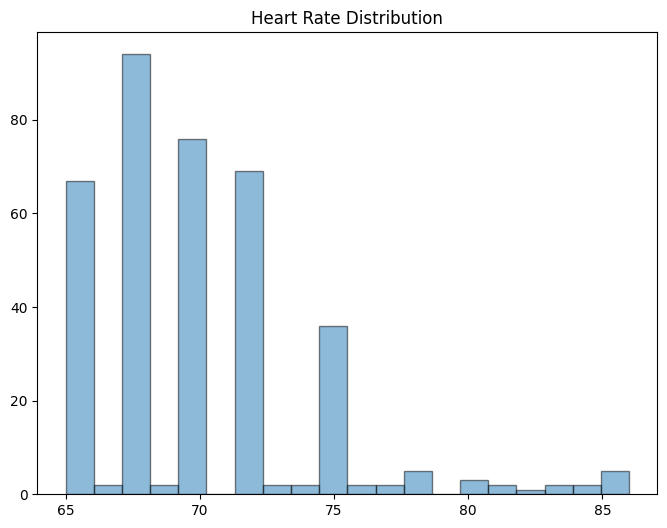

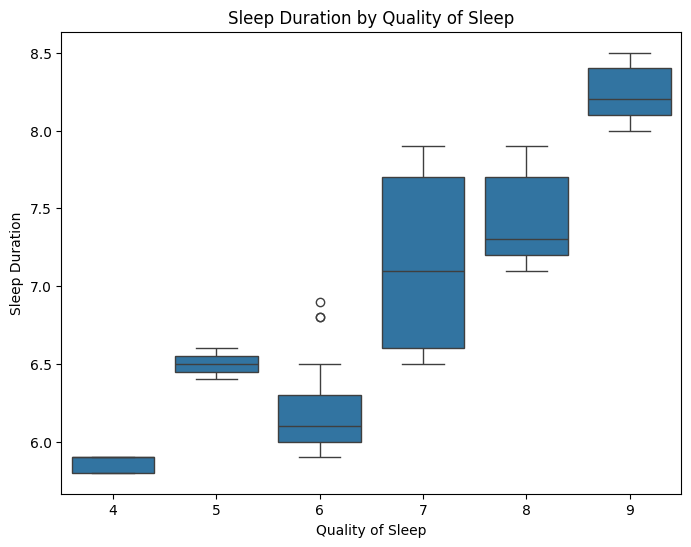

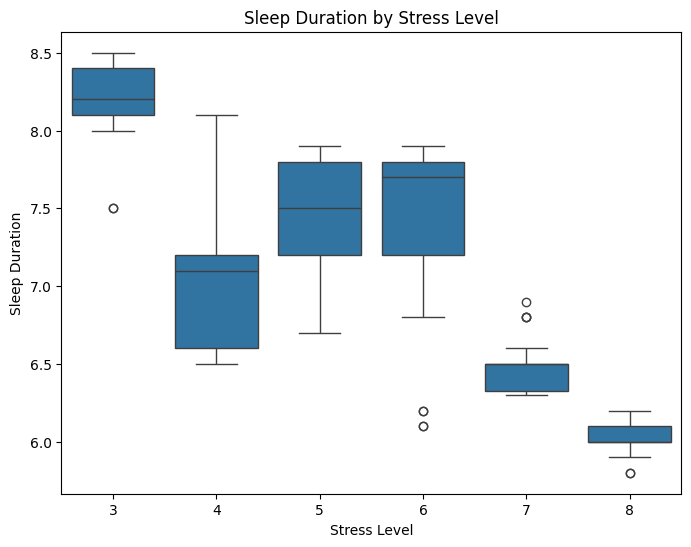

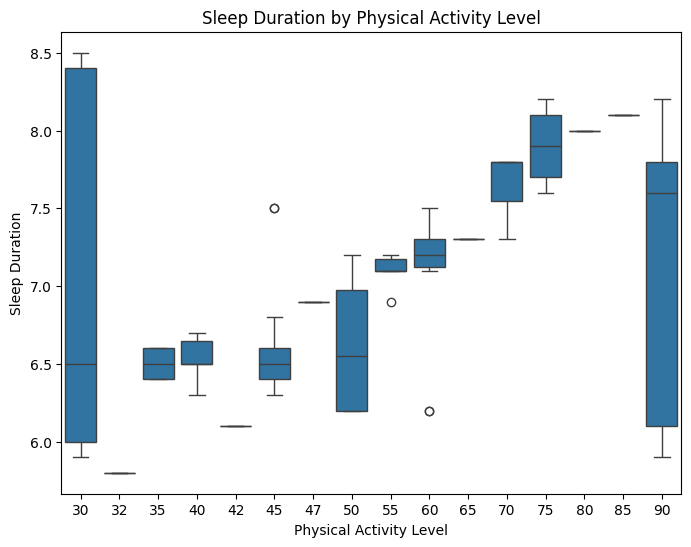

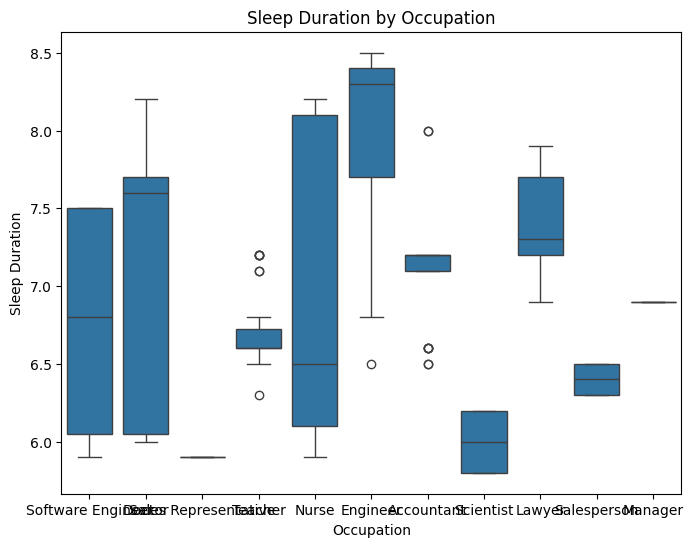

C:\Users\frona\AppData\Local\Temp\ipykernel_31228\3699372558.py:103: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(quality_groups, labels=np.unique(quality_of_sleep))


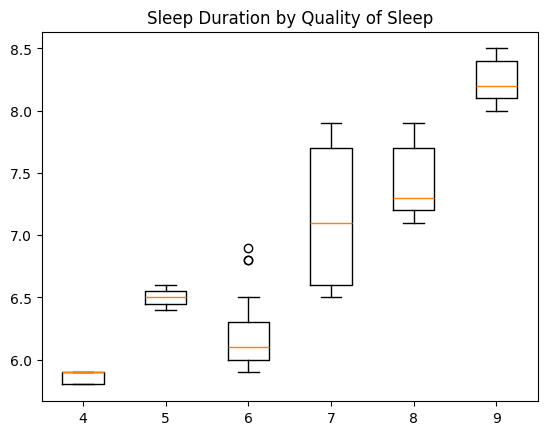

C:\Users\frona\AppData\Local\Temp\ipykernel_31228\3699372558.py:108: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(stress_groups, labels=np.unique(stress_level))


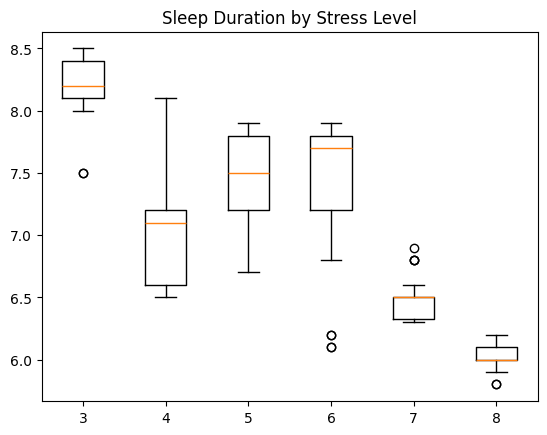

C:\Users\frona\AppData\Local\Temp\ipykernel_31228\3699372558.py:113: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(activity_groups, labels=np.unique(physical_activity))


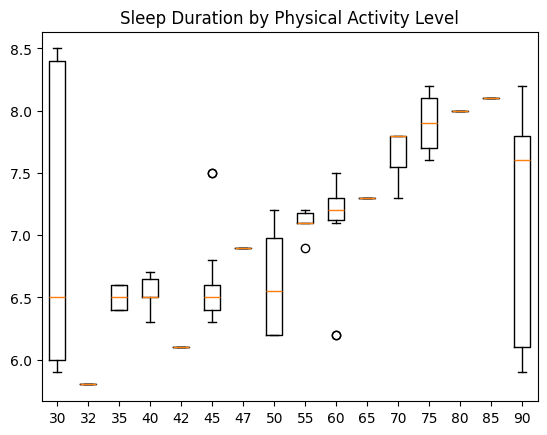

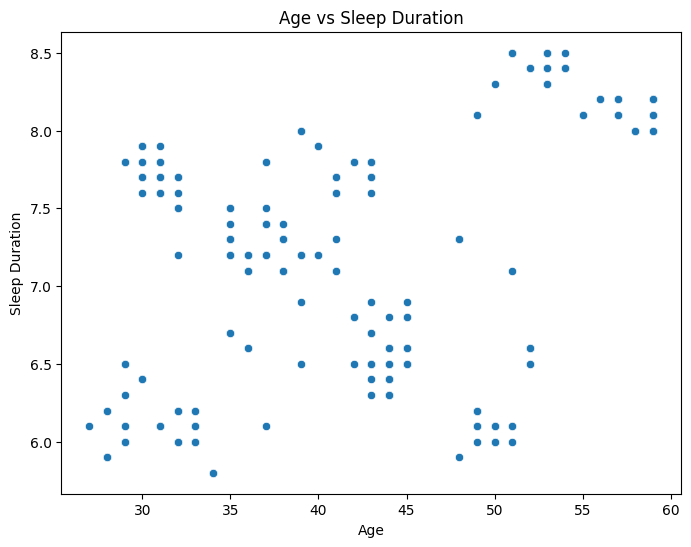

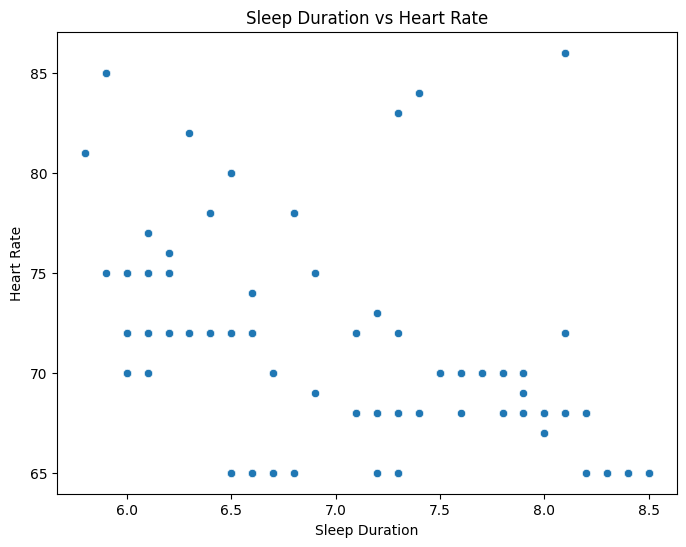

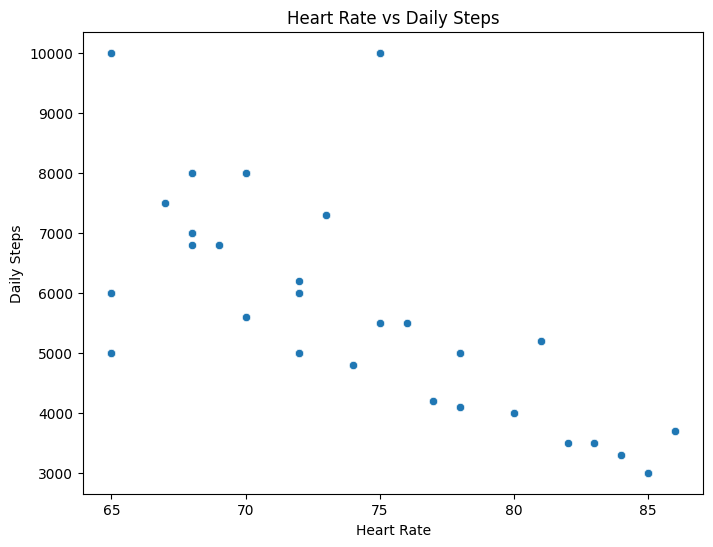

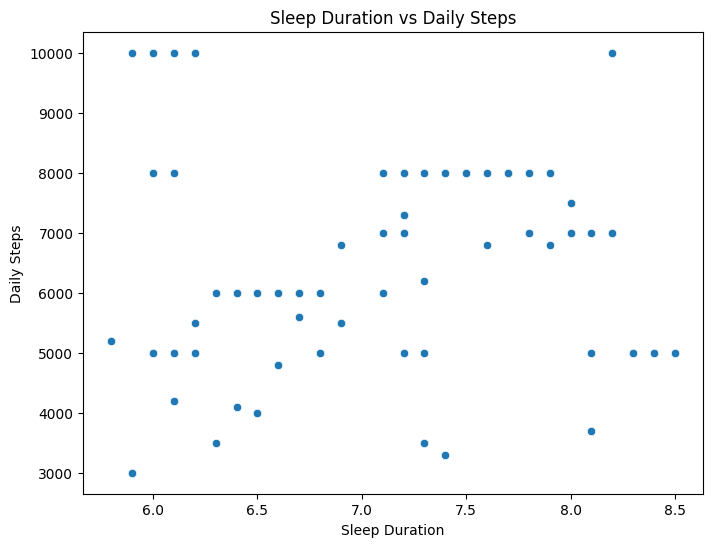

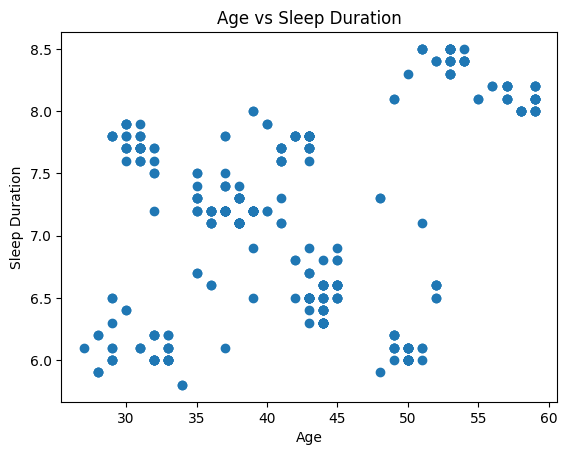

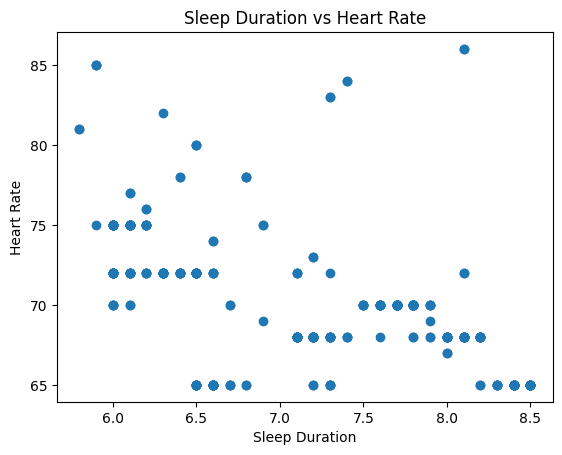

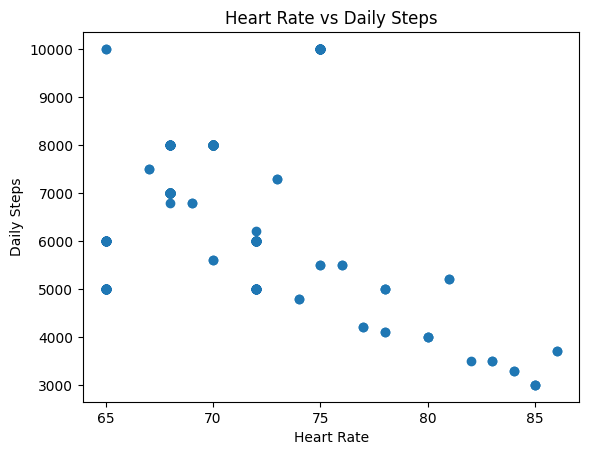

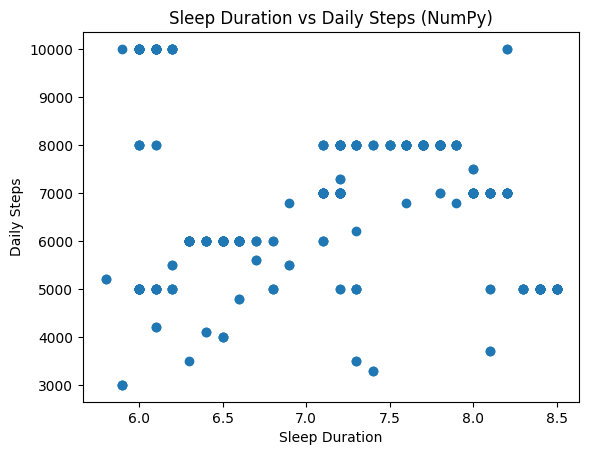

Only use pandas: 0.0
Only use numpy: 0.0


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

df = pd.read_csv('sleep_health.csv')

#Use pandas to plot
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['Sleep Duration'], kde=True)
plt.title('Sleep Duration Distribution')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['Quality of Sleep'], kde=True)
plt.title('Quality of Sleep Distribution')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['Physical Activity Level'], kde=True)
plt.title('Physical Activity Level Distribution')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['Stress Level'], kde=True)
plt.title('Stress Level Distribution')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['Heart Rate'], kde=True)
plt.title('Heart Rate Distribution')
plt.show()

data = np.genfromtxt('sleep_health.csv', delimiter=',', skip_header=0, dtype=None, encoding='utf-8', names=True)
sleep_duration = data['Sleep_Duration'].astype(float) 
age = data['Age'].astype(int)  
heart_rate = data['Heart_Rate'].astype(int)  
daily_steps = data['Daily_Steps'].astype(int)
quality_of_sleep = data["Quality_of_Sleep"].astype(int)   
physical_activity = data["Physical_Activity_Level"].astype(int)  
stress_level = data["Stress_Level"].astype(int)  

#Use numpy to plot
plt.figure(figsize=(8, 6))
plt.hist(age,bins=20, alpha=0.5,edgecolor='black')
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(sleep_duration, bins=20, alpha=0.5,edgecolor='black')
plt.title('Sleep Duration Distribution')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(quality_of_sleep, bins=20, alpha=0.5,edgecolor='black')
plt.title('Quality of Sleep Distribution')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(physical_activity, bins=20, alpha=0.5,edgecolor='black')
plt.title('Physical Activity Level Distribution')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(stress_level, bins=20, alpha=0.5,edgecolor='black')
plt.title('Stress Level Distribution')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(heart_rate, bins=20, alpha=0.5,edgecolor='black')
plt.title('Heart Rate Distribution')
plt.show()

# Use pandas to plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Quality of Sleep', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Quality of Sleep')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Stress Level', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Stress Level')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Physical Activity Level', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Physical Activity Level')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Occupation', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Occupation')
plt.show()

#use numpy to plot
quality_groups = [sleep_duration[quality_of_sleep == q] for q in np.unique(quality_of_sleep)]
plt.boxplot(quality_groups, labels=np.unique(quality_of_sleep))
plt.title('Sleep Duration by Quality of Sleep')
plt.show()

stress_groups = [sleep_duration[stress_level == s] for s in np.unique(stress_level)]
plt.boxplot(stress_groups, labels=np.unique(stress_level))
plt.title('Sleep Duration by Stress Level')
plt.show()

activity_groups = [sleep_duration[physical_activity == p] for p in np.unique(physical_activity)]
plt.boxplot(activity_groups, labels=np.unique(physical_activity))
plt.title('Sleep Duration by Physical Activity Level')
plt.show()

#use pandas to see the relation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Sleep Duration', data=df)
plt.title('Age vs Sleep Duration')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sleep Duration', y='Heart Rate', data=df)
plt.title('Sleep Duration vs Heart Rate')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Heart Rate', y='Daily Steps', data=df)
plt.title('Heart Rate vs Daily Steps')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sleep Duration', y='Daily Steps', data=df)
plt.title('Sleep Duration vs Daily Steps')
plt.show()

#Use numpy to see the relation
plt.scatter(age, sleep_duration)
plt.title('Age vs Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration')
plt.show()

plt.scatter(sleep_duration, heart_rate)
plt.title('Sleep Duration vs Heart Rate')
plt.xlabel('Sleep Duration')
plt.ylabel('Heart Rate')
plt.show()

daily_steps = data['Daily_Steps'].astype(int) 
plt.scatter(heart_rate, daily_steps)
plt.title('Heart Rate vs Daily Steps')
plt.xlabel('Heart Rate')
plt.ylabel('Daily Steps')
plt.show()

plt.scatter(sleep_duration, daily_steps)
plt.title('Sleep Duration vs Daily Steps (NumPy)')
plt.xlabel('Sleep Duration')
plt.ylabel('Daily Steps')
plt.show()

#Time difference
start_pandas = time.time()
end_pandas = time.time()
print(f"Only use pandas: {end_pandas - start_pandas}")

start_numpy = time.time()
end_numpy = time.time()
print(f"Only use numpy: {end_numpy - start_numpy}")



AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy

